# **Guided Lab 343.4.1 - Concatenate Multiple Data Frames**

## **Lab Objective:**

In this lab, we will learn how to concatenate two or more pandas DataFrame by rows and columns with examples. We will get data from three csv files and combine data into one DataFrame by using concat() function.

## **Learning Objectives;**
By the end of this lab, learners will be able to
- Utilizing the `concat()` function for DataFrame concatenation.
- Explain how to concatenate along different axes (rows or columns).
- Applying the `ignore_index` parameter to reset the index in the resulting DataFrame.
- Using the `keys` parameter to create a hierarchical index for tracking the original DataFrames.
- Handling overlapping indexes during concatenation with `ignore_index`.
- Accessing specific columns using square bracket notation [ ] and conditions.


# **Introduction:**
The concat() method in Pandas is a powerful tool that lets you combine DataFrames or Series along a particular axis (either rows or columns). It’s especially useful for merging and analyzing datasets with similar structures.

Here’s a quick overview of the concat() method and its parameters:

    pandas.concat(objs, axis=0, join=’outer’, ignore-index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)
  
**Here is a breakdown of the key parameters and what they do:**

- ‘objs’: Used to sequence or map DataFrames or Series for concatenation.

- ‘axis’: This defines the axis on which data is concatenated along. By default, it’s set to 0, meaning the function continues concatenating vertically.

- ‘join’: Specifies how to handle indexes on the other axis. Options include ‘outer’, which unions all indexes, or ‘inner’, which intersects them. It defaults to outer.

- ‘ignore_index’: Resets the index in the resulting DataFrame or Series. It’s set to False by default.

- ‘keys’: This is an optional sequence used to create a hierarchical index for the concatenated objects.

- ‘levels’: This allows specifying unique values to use when constructing a MultiIndex.

- ‘names’: Provides the ability to assign names for the levels in the resulting hierarchical index.

- ‘verify_integrity’: If set to True, this checks whether the new concatenated axis contains duplicates. It defaults to False.

- ‘sort’: This sorts the non-concatenation axis if it isn’t aligned with join=‘outer’ and is set to True. By default, it’s set to False.

- ‘copy’: When set to False, this avoids copying data from input objects, if possible. It’s set to True by default.



# **Pandas concat() examples**

In [1]:
import pandas as pd

In [2]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },

)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },

)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },

)


frames = [df1, df2, df3]

result = pd.concat(frames)

result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


If you notice in the above example, it just added the row index as-is from two DataFrame, sometimes you may want to reset the index. You can do so by using the **ignore_index=True** param.

In [3]:
result = pd.concat(frames,  ignore_index=True)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


### **Assigning keys to indexes**
The '**keys**' parameter creates a hierarchical index for the concatenated objects, which is useful for tracking the original DataFrames after concatenation.



In [4]:
result = pd.concat(frames, keys=["x", "y", "z"])
print(result)

       A    B    C    D
x 0   A0   B0   C0   D0
  1   A1   B1   C1   D1
  2   A2   B2   C2   D2
  3   A3   B3   C3   D3
y 0   A4   B4   C4   D4
  1   A5   B5   C5   D5
  2   A6   B6   C6   D6
  3   A7   B7   C7   D7
z 0   A8   B8   C8   D8
  1   A9   B9   C9   D9
  2  A10  B10  C10  D10
  3  A11  B11  C11  D11


As you can see (if you’ve read the rest of the documentation), the resulting object’s index has a hierarchical index. This means that we can now select out each chunk by key:


In [5]:
result_y = result.loc[("y")]
print(result_y)

    A   B   C   D
0  A4  B4  C4  D4
1  A5  B5  C5  D5
2  A6  B6  C6  D6
3  A7  B7  C7  D7


The above line access the sub-DataFrame associated with the key "y" in the concatenated DataFrame.

## **Ignoring indexes on the concatenation axis**

For DataFrame objects which don’t have a meaningful index, you may wish to append them and ignore the fact that they may have overlapping indexes. To do this, use the ignore_index argument:

Let's create one more dataFrame.

In [6]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[12, 13, 14, 15],
)

df4

,B,D,F
12,B2,D2,F2
13,B3,D3,F3
14,B6,D6,F6
15,B7,D7,F7


In [8]:
result = pd.concat([df1, df4], ignore_index=True, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


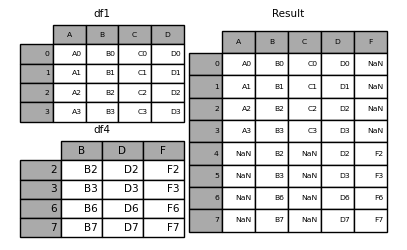

In [9]:
result = pd.concat([df1, df4], axis=1, sort=False)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,B2,D2,F2
13,NaN,NaN,NaN,NaN,B3,D3,F3
14,NaN,NaN,NaN,NaN,B6,D6,F6
15,NaN,NaN,NaN,NaN,B7,D7,F7


## **Example 2 - Pandas Read Multiple CSV Files into DataFrame**

Sometimes you may need to read or import multiple CSV files from a folder or from a list of files and convert them into a Pandas DataFrame. You can do this by reading each CSV file into a DataFrame and appending or concatenating the DataFrames to create a single DataFrame with data from all files.

When you want to read multiple CSV files that exist in different folders, first create a list of strings with absolute paths and use it as shown below to load all CSV files and create one big Pandas DataFrame.

Download following files:

[RealEstate1.csv](https://drive.google.com/file/d/1lh82D1ayU7UcdhVsZwqabpQM9N-OIWiX/view?usp=sharing)

[RealEstate2.csv](https://drive.google.com/file/d/1ZVluDBSJAdTupPQt3arzZx044YbpuD8l/view?usp=sharing)

[RealEstate3.csv](https://drive.google.com/file/d/1DItTbU4m2k9lz-Qv-vFf8zMSkpRawJXl/view?usp=sharing)

In [10]:
# do not forget to change the path of the CSV files as per your system.
realState_df1=pd.read_csv('./Data/RealEstate1.csv')
realState_df2=pd.read_csv('./Data/RealEstate2.csv')
realState_df3=pd.read_csv('./Data/RealEstate3.csv')

realStateDataFrame = pd.concat([realState_df1,realState_df2,realState_df3], axis=0, ignore_index=False)
realStateDataFrame

,ID,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price SQ Ft,Status
0,1,143178,Santa Maria-Orcutt,375000,4,2,1963,191.03,Short Sale
1,2,143217,Santa Maria-Orcutt,330000,3,3,1900,173.68,Short Sale
2,3,143252,Santa Maria-Orcutt,199000,3,3,1450,137.24,Short Sale
3,4,143255,Santa Maria-Orcutt,165000,2,2,1000,165.00,Short Sale
0,5,143436,Templeton,1399000,4,3,6500,215.23,Foreclosure
1,6,143507,Santa Maria-Orcutt,255000,3,2,1218,209.36,Short Sale
2,7,143524,Cambria,325000,2,2,893,363.94,Short Sale
3,8,143534,Morro Bay,789000,3,3,2100,375.71,Foreclosure
0,9,143540,Nipomo,498000,4,3,2341,212.73,Short Sale
1,10,143884,Nipomo,430000,4,2,2168,198.34,Short Sale


**Lets access spepcific column by using Square bracker [].**

In [11]:
# select single column by column index number
#s = df[df.columns[0]]
realStateDataFrame[realStateDataFrame.columns[1]]

0    143178
1    143217
2    143252
3    143255
0    143436
1    143507
2    143524
3    143534
0    143540
1    143884
2    143946
3    144204
4    144238
Name: MLS, dtype: int64

In [12]:
# select column to Series
#s = df['colName']
s = realStateDataFrame['MLS']
s



0    143178
1    143217
2    143252
3    143255
0    143436
1    143507
2    143524
3    143534
0    143540
1    143884
2    143946
3    144204
4    144238
Name: MLS, dtype: int64

In [13]:
#df[df["columName"] > condidtion]
s = realStateDataFrame[realStateDataFrame['Bedrooms'] > 3 ]
s

,ID,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price SQ Ft,Status
0,1,143178,Santa Maria-Orcutt,375000,4,2,1963,191.03,Short Sale
0,5,143436,Templeton,1399000,4,3,6500,215.23,Foreclosure
0,9,143540,Nipomo,498000,4,3,2341,212.73,Short Sale
1,10,143884,Nipomo,430000,4,2,2168,198.34,Short Sale
2,11,143946,Paso Robles,539900,4,3,3032,178.07,Short Sale
